In [1]:
!pip install opencv-python

In [2]:
# !pip install opencv-python
import numpy as np
import cv2
from matplotlib import pyplot as plt


def crophead(img):
    height, width = img.shape[0:2]
    startRow = int(height*.25)

    startCol = int(width*.20)

    endRow = int(height*.95)

    endCol = int(width*.80)
    croppedImage = img[startRow:endRow, startCol:endCol]
    return croppedImage

class Subject:
    def __init__(self,name):
        self.name = name

        self.happy = np.array([])
        self.happy_crophead = np.array([])
        self.happy_ppd_4030 = np.array([])
        self.happy_ppd_8060 = np.array([])

        self.normal = np.array([])
        self.normal_crophead = np.array([])
        self.normal_ppd_4030 = np.array([])
        self.normal_ppd_8060 = np.array([])

        self.sad = np.array([])
        self.sad_crophead = np.array([])
        self.sad_ppd_4030 = np.array([])
        self.sad_ppd_8060 = np.array([])
        
        self.surprise = np.array([])
        self.surprise_crophead = np.array([])
        self.surprise_ppd_4030 = np.array([])
        self.surprise_ppd_8060 = np.array([])
        
        self.wink = np.array([])
        self.wink_crophead = np.array([])
        self.wink_ppd_4030 = np.array([])
        self.wink_ppd_8060 = np.array([])




        
        
    def training_preprocessing(self,happy,normal,sad): 
        self.happy = happy
        self.happy_crophead = crophead(self.happy)
        self.happy_ppd_4030 = cv2.resize(self.happy_crophead,(40,30))
        self.happy_ppd_8060 = cv2.resize(self.happy_crophead,(80,60))
        
        self.normal = normal
        self.normal_crophead = crophead(self.normal)
        self.normal_ppd_4030 = cv2.resize(self.normal_crophead,(40,30))
        self.normal_ppd_8060 = cv2.resize(self.normal_crophead,(80,60))

        self.sad = sad
        self.sad_crophead = crophead(sad)
        self.sad_ppd_4030 = cv2.resize(self.sad_crophead,(40,30))
        self.sad_ppd_8060 = cv2.resize(self.sad_crophead,(80,60))
        

    
    def testing_preprocessing(self,surprise,wink):
        self.surprise = surprise
        self.surprise_crophead = crophead(surprise)
        self.surprise_ppd_4030 = cv2.resize(self.surprise_crophead,(40,30))
        self.surprise_ppd_8060 = cv2.resize(self.surprise_crophead,(80,60))

        self.wink = wink
        self.wink_crophead = crophead(wink)
        self.wink_ppd_4030 = cv2.resize(self.wink_crophead,(40,30))
        self.wink_ppd_8060 = cv2.resize(self.wink_crophead,(80,60)) 
    
    
    def training_mypreprocessing(self,happy,normal,sad):
        self.happy = happy
        self.happy_ppd_4030 = cv2.resize(self.happy,(40,30))
        self.happy_ppd_8060 = cv2.resize(self.happy,(80,60))

        self.normal  = normal
        self.normal_ppd_4030 = cv2.resize(self.normal,(40,30))
        self.normal_ppd_8060 = cv2.resize(self.normal,(80,60))

        self.sad = sad
        self.sad_ppd_4030 = cv2.resize(self.sad,(40,30))
        self.sad_ppd_8060 = cv2.resize(self.sad,(80,60))
        
    def testing_mypreprocessing(self,surprise,wink):  
        self.surprise = surprise
        self.surprise_ppd_4030 = cv2.resize(self.surprise,(40,30))
        self.surprise_ppd_8060 = cv2.resize(self.surprise,(80,60))

        self.wink = wink
        self.wink_ppd_4030 = cv2.resize(self.wink,(40,30))
        self.wink_ppd_8060 = cv2.resize(self.wink,(80,60))    
    
        
        


In [3]:
def training_getsubject(path,name,subject_number):
    #Converting to grayscale while reading the image
    happy = cv2.cvtColor(cv2.imread(path+str(subject_number)+"_happy.jpg"), cv2.COLOR_RGB2GRAY)
    normal = cv2.cvtColor(cv2.imread(path+str(subject_number)+"_normal.jpg"), cv2.COLOR_RGB2GRAY)
    sad = cv2.cvtColor(cv2.imread(path+str(subject_number)+"_sad.jpg"), cv2.COLOR_RGB2GRAY)
    subject_details = Subject(name)
    subject_details.training_preprocessing(happy,normal,sad)
    return subject_details

In [4]:
np.shape(training_getsubject('D:\CSE5IR\Assignment\Training_faces\subject','james',1).happy)

(300, 300)

In [5]:
def training_getMysubject(path,name,subject_number):
    #Converting to grayscale while reading the image
    happy = cv2.cvtColor(cv2.imread(path+str(subject_number)+"_happy.jpg"), cv2.COLOR_RGB2GRAY)
    normal = cv2.cvtColor(cv2.imread(path+str(subject_number)+"_normal.jpg"), cv2.COLOR_RGB2GRAY)
    sad = cv2.cvtColor(cv2.imread(path+str(subject_number)+"_sad.jpg"), cv2.COLOR_RGB2GRAY)
    subject_details = Subject(name)
    subject_details.training_mypreprocessing(happy,normal,sad)
    return subject_details

In [6]:
def testing_getsubject(path,name,subject_number):
    #Converting to grayscale while reading the image
    surprise = cv2.cvtColor(cv2.imread(path+str(subject_number)+"_surprised.jpg"), cv2.COLOR_RGB2GRAY)
    wink = cv2.cvtColor(cv2.imread(path+str(subject_number)+"_wink.jpg"), cv2.COLOR_RGB2GRAY)
    subject_details = Subject(name)
    subject_details.testing_preprocessing(surprise,wink)
    return subject_details

In [7]:
def testing_getMysubject(path,name,subject_number):
    #Converting to grayscale while reading the image
    surprise = cv2.cvtColor(cv2.imread(path+str(subject_number)+"_surprised.jpg"), cv2.COLOR_RGB2GRAY)
    wink = cv2.cvtColor(cv2.imread(path+str(subject_number)+"_wink.jpg"), cv2.COLOR_RGB2GRAY)
    subject_details = Subject(name)
    subject_details.testing_mypreprocessing(surprise,wink)
    return subject_details

In [8]:
#Names in training and test are sameReading text file
f = open("Training_faces/names_of_the_subjects_in_training_dataset.txt", "r")
file_contents = f.read()
contents_split = file_contents.splitlines()
#Extracting names
names = [contents_split[0][11:],contents_split[1][11:],contents_split[2][11:],\
contents_split[3][11:],contents_split[4][11:],contents_split[5][11:],\
contents_split[6][11:],contents_split[7][11:],contents_split[8][11:],contents_split[9][11:]]


In [9]:
names

['James',
 'Chris',
 'Anthony',
 'Charels',
 'Ahmed',
 'Michael',
 'Brad',
 'John',
 'Darren',
 'Hamim']

In [10]:
#Making a list of Class instances
#Training dataset as a list
People_training = []
for i in range(0,10):
    if(i<9):
        People_training.append(training_getsubject("Training_faces\subject",names[i],i+1))
    else:
        People_training.append(training_getMysubject("Training_faces\subject",names[i],i+1))
    
len(People_training)

10

In [11]:
np.shape(People_training[0].happy_ppd_4030)

(30, 40)

In [12]:
# testing_getsubject(testing_getsubject("D:\CSE5IR\Assignment\testing_faces\subject",'hi',1))
cv2.cvtColor(cv2.imread("Testing_faces\subject1_wink.jpg"), cv2.COLOR_RGB2GRAY)

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [13]:
pwd

'D:\\CSE5IR\\Assignment\\Final_code_submission'

In [14]:
#Making a list of Class instances
#Testing dataset as a list
People_testing = []
for i in range(0,10):
    if(i<9):
        People_testing.append(testing_getsubject("Testing_faces\subject",names[i],i+1))
    else:
        People_testing.append(testing_getMysubject("Testing_faces\subject",names[i],i+1))
    
len(People_testing)

10

In [15]:
#Same 
print("Name :",People_training[9].name)
print("Original shape",np.shape(People_training[9].happy))
print("Resized shape",np.shape(People_training[9].happy_ppd_4030))
print("Resized shape",np.shape(People_training[9].happy_ppd_8060))

Name : Hamim
Original shape (300, 300)
Resized shape (30, 40)
Resized shape (60, 80)


In [16]:
People_training[9].surprise

array([], dtype=float64)

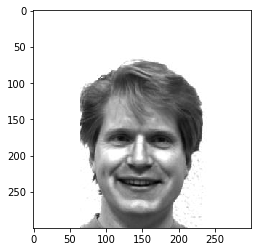

In [17]:
plt.imshow(People_training[0].happy,cmap='gray')

In [18]:
def plot_portraits(images, titles,n_row, n_col):
    plt.figure(figsize=(2.2 * n_col, 2.2 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i], cmap=plt.cm.gray)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())

In [19]:
images = []

for i in range(len(People_training)):
    images.append(People_training[i].normal_ppd_8060)
    images.append(People_training[i].happy_ppd_8060)
    images.append(People_training[i].sad_ppd_8060)
titles_revised = []
for i in range(len(names)):
    titles_revised.append(names[i])
    titles_revised.append(names[i])
    titles_revised.append(names[i])


In [20]:
names

['James',
 'Chris',
 'Anthony',
 'Charels',
 'Ahmed',
 'Michael',
 'Brad',
 'John',
 'Darren',
 'Hamim']

Training dataset


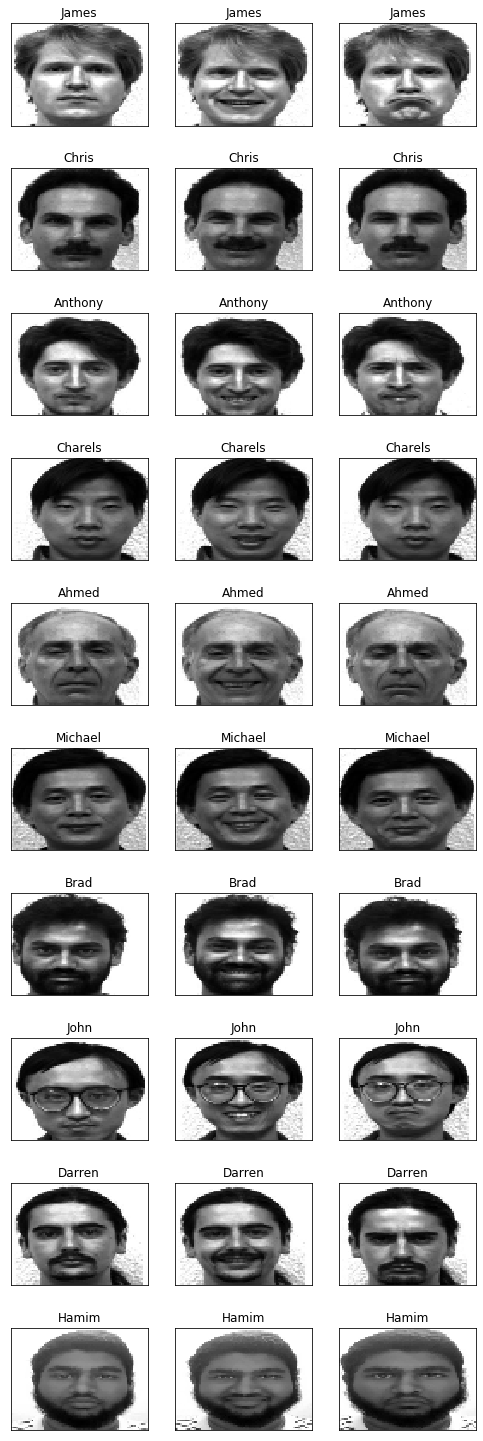

In [21]:
print('Training dataset')
plot_portraits(images,titles_revised,10,3)

In [22]:
names

['James',
 'Chris',
 'Anthony',
 'Charels',
 'Ahmed',
 'Michael',
 'Brad',
 'John',
 'Darren',
 'Hamim']

Testing dataset


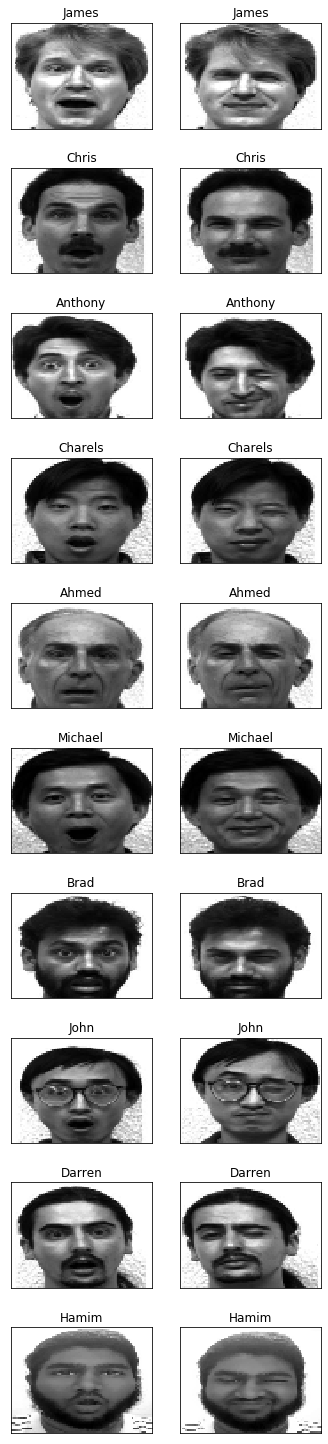

In [23]:
images = []
for i in range(len(People_testing)):
    images.append(People_testing[i].surprise_ppd_8060)
    images.append(People_testing[i].wink_ppd_8060)
titles_revised = []
for i in range(len(names)):
    titles_revised.append(names[i])
    titles_revised.append(names[i])
print('Testing dataset')
plot_portraits(images,titles_revised,10,2)

In [24]:
# im = []
# for k in range(10):
#     im.append(People[k].normal_ppd_8060)
#     im.append(People[k].happy_ppd_8060)
#     im.append(People[k].sad_ppd_8060)
# np.shape(im)    

# Performing analysis on 80 x 60 sized images

In [25]:
#Creating a list of all images flattened Training images
def obtaindatavectors(k):
    out= np.zeros(People_training[k].normal_ppd_8060.shape, np.double)
    nl = cv2.normalize(People_training[k].normal_ppd_8060.reshape(-1), out, 1.0, 0.0, cv2.NORM_MINMAX, dtype=cv2.CV_64F)
    hp = cv2.normalize(People_training[k].sad_ppd_8060.reshape(-1), out, 1.0, 0.0, cv2.NORM_MINMAX, dtype=cv2.CV_64F)
    sd = cv2.normalize(People_training[k].happy_ppd_8060.reshape(-1), out, 1.0, 0.0, cv2.NORM_MINMAX, dtype=cv2.CV_64F)    
#     cl = People[k].cl_ppd.flatten()
#     nl = People[k].normal_ppd.flatten()
#     hp = People[k].happy_ppd.flatten()
#     sd = People[k].sad_ppd.flatten() 
    image = nl,hp,sd
    return image
images_flattened = []
for i in range(0,10):
    images_flattened.append(obtaindatavectors(i))
import itertools
flattened_list = list(itertools.chain(*images_flattened))
flattened_list = np.transpose(flattened_list)
flattened_list = np.asmatrix(flattened_list)
Training_flattened = (flattened_list.T)
print(np.shape(Training_flattened))

(30, 4800)


In [26]:
#Creating a list of all  flattened Testing images
def obtaindatavectors(k):
    out= np.zeros(People_training[k].normal_ppd_8060.shape, np.double)
    spd = cv2.normalize(People_testing[k].surprise_ppd_8060.reshape(-1), out, 1.0, 0.0, cv2.NORM_MINMAX, dtype=cv2.CV_64F)
    wnk = cv2.normalize(People_testing[k].wink_ppd_8060.reshape(-1), out, 1.0, 0.0, cv2.NORM_MINMAX, dtype=cv2.CV_64F)    
#     cl = People[k].cl_ppd.flatten()
#     nl = People[k].normal_ppd.flatten()
#     hp = People[k].happy_ppd.flatten()
#     sd = People[k].sad_ppd.flatten() 
    image = spd,wnk
    return image
images_flattened = []
for i in range(0,10):
    images_flattened.append(obtaindatavectors(i))
import itertools
flattened_list = list(itertools.chain(*images_flattened))
flattened_list = np.transpose(flattened_list)
flattened_list = np.asmatrix(flattened_list)

Testing_flattened = (flattened_list.T)
print(np.shape(Testing_flattened))

(20, 4800)


### Training eigenfaces 

In [27]:

faces_matrix = Training_flattened.copy()

### Performing PCA on training images

(4800, 4800)

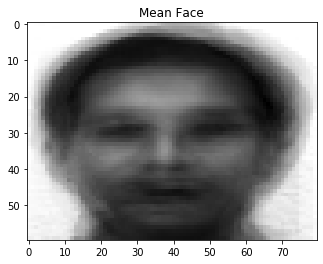

In [28]:
mean_face = np.mean(faces_matrix, axis=0)
mean_face.shape
plt.imshow(mean_face.reshape(60,80),cmap='gray'); 
plt.title('Mean Face')

### normalization
faces_norm = faces_matrix - mean_face
faces_norm.shape
# Calculate covariance matrix
face_cov = np.cov(faces_norm.T) #np.cov expects features as rows and observations as columns, so transposed
face_cov.shape

In [29]:
eigen_vals_eig,eigen_vecs_eig = np.linalg.eig(face_cov)
#Checking shape
print("Shape of eigen vectors",eigen_vecs_eig.shape)
print("Shape of eigen values",eigen_vals_eig.shape)
#Removing the imaginary numbers
eigen_vecs_eig = np.real(eigen_vecs_eig)
eigen_vals_eig = np.real(eigen_vals_eig)

#Sorting eigenValues with their corresponding eigenvectors
idx = eigen_vals_eig.argsort()[::-1]   
eigen_vals_eig = eigen_vals_eig[idx]
eigen_vecs_eig = eigen_vecs_eig[:,idx]

Shape of eigen vectors (4800, 4800)
Shape of eigen values (4800,)


Text(0.5, 0.98, 'Top 10 Eigenfaces')

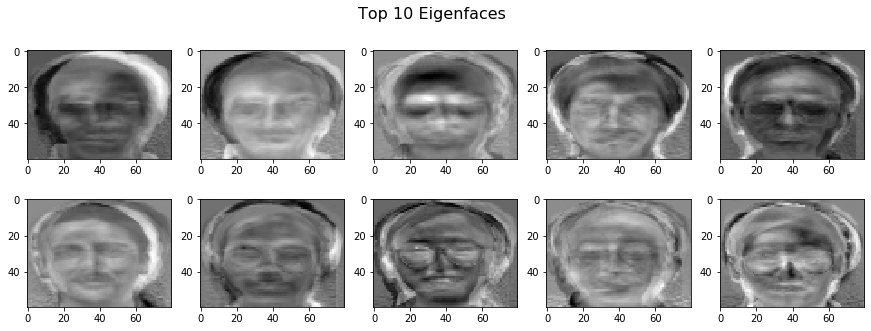

In [30]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
for i in np.arange(10):
    ax = plt.subplot(2,5,i+1)
    img = eigen_vecs_eig[:,i].reshape(60,80)
    plt.imshow(img, cmap='gray')
fig.suptitle("Top 10 Eigenfaces", fontsize=16)

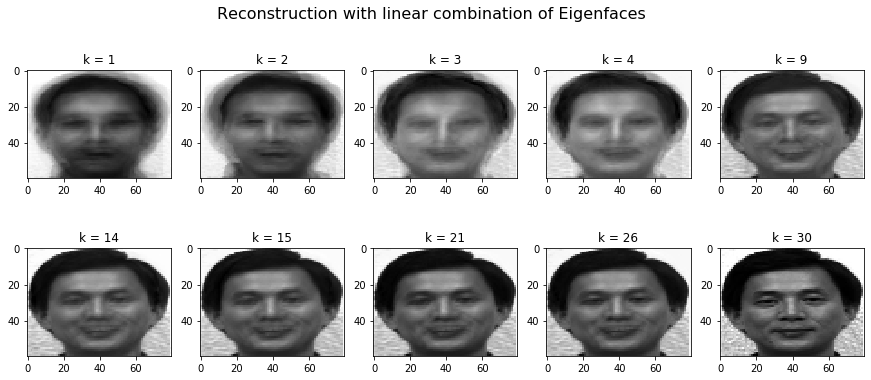

In [31]:
fig, axs = plt.subplots(2,5,figsize=(15,6))
for k, i in zip([0,1,2,3,8,13,14,20,25,29,34,4000],np.arange(10)):
    # Reconstruct the first picture '1a.jpg' whose index is 0.
    weight = faces_norm[15,:].dot(eigen_vecs_eig[:,:k]) # Get PC scores of the images
    projected_face = weight.dot(eigen_vecs_eig[:,:k].T) # Reconstruct first face in dataset using k PCs
    ax = plt.subplot(2,5,i+1)
    ax.set_title("k = "+str(k+1))
    plt.imshow(projected_face.reshape(60,80)+mean_face.reshape(60,80),cmap='gray');
fig.suptitle(("Reconstruction with linear combination of Eigenfaces"), fontsize=16);

In [32]:
def projecFaces(k):
    #Dot product between K_eigenfaces with deviations
    w = faces_norm[:,:].dot(eigen_vecs_eig[:,:k]) # Get PC scores of the images
    #The forloop below is normalizing weights
    for i in range(np.shape(w)[1]):
        w[:,i:i+1] = w[:,i:i+1]/np.linalg.norm(w[:,i:i+1])
    return w


In [33]:
weights = projecFaces(30)

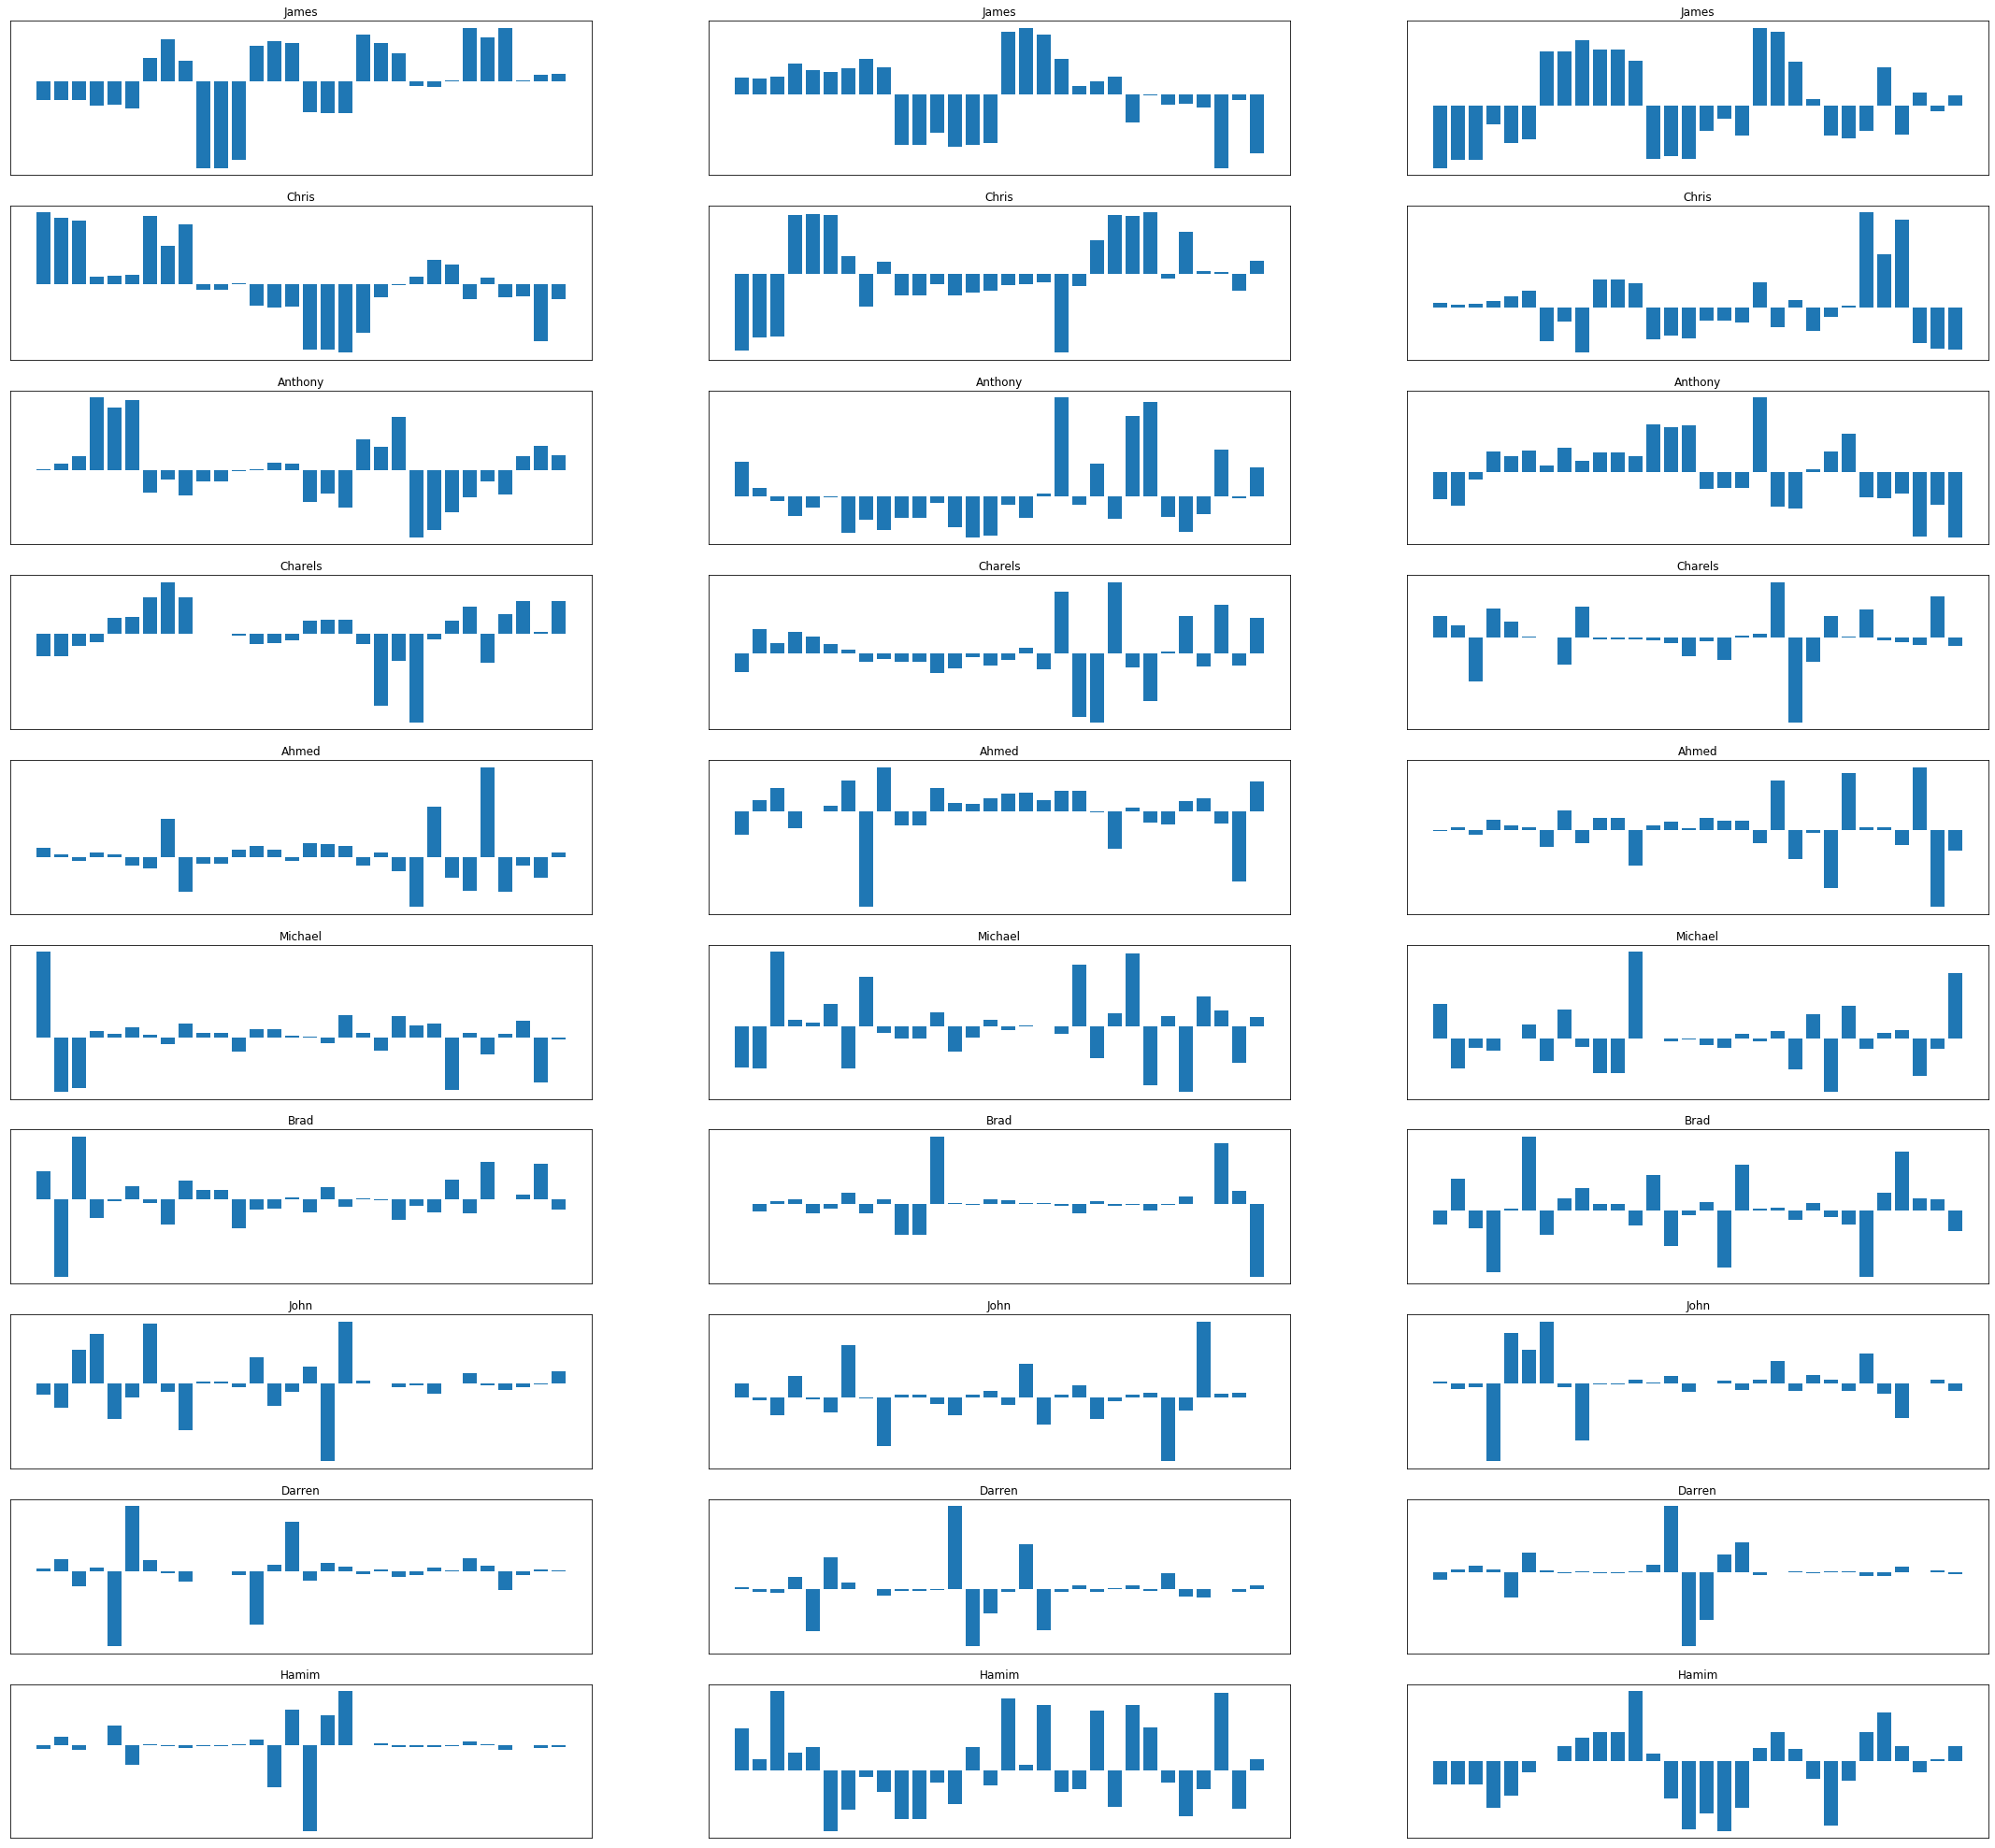

In [34]:
def plotLinearCoefficient(weights, titles,k):
    plt.figure(figsize=(30,30))
    plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.20)
    for i in range(30):
        plt.subplot(10, 3, i + 1)
        lists_of_list = weights[:,i:i+1].tolist()
        flattened = [val for sublist in lists_of_list for val in sublist]
        x = range(0,30)
        plt.bar(x,flattened)
        plt.title(titles[i])
        plt.xticks(())
        plt.yticks(())


titles_revised = []
for i in range(len(names)):
    titles_revised.append(names[i])
    titles_revised.append(names[i])
    titles_revised.append(names[i])


plotLinearCoefficient(weights,titles_revised,k)
print("")

### Now lets recognize an Test Faces

# For cumulative sum of explained variance (K = 0.85)

In [35]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eigen_vals_eig[i]), eigen_vecs_eig[:,i]) for i in range(len(eigen_vals_eig))]

# Only keep a certain number of eigen vectors based on 
# the "explained variance percentage" which tells us how 
# much information (variance) can be attributed to each 
# of the principal components

exp_var_percentage = 1 # Threshold of 85% explained variance

tot = sum(eigen_vals_eig)
var_exp = [(i / tot)*100 for i in sorted(eigen_vals_eig, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

num_vec_to_keep = 0

for index, percentage in enumerate(cum_var_exp/100):
    if (percentage > exp_var_percentage):
        num_vec_to_keep = index + 1
        break

In [36]:
print("Number of eigenfaces that have 85% of information : ", num_vec_to_keep)

Number of eigenfaces that have 85% of information :  28


Cumulative proportion of variance explained vector: 
[ 23.9523696   39.94852839  52.2428789   61.20290104  68.50280943
  74.87544388  80.01567555  83.00564026  85.90721983  88.11846431
  89.86771291  91.45299243  92.89847016  93.9435313   94.82248007
  95.6221054   96.41737709  97.06979021  97.6859837   98.10053397
  98.4551039   98.79791066  99.07953933  99.34839826  99.55123725
  99.72300452  99.87345144 100.         100.        ]


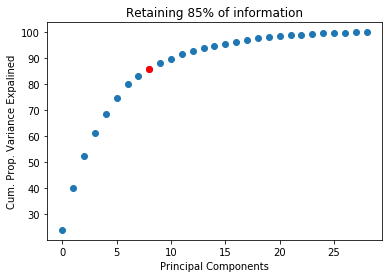

In [37]:
var_comp_sum = cum_var_exp[:29]

# Show cumulative proportion of varaince with respect to components
print("Cumulative proportion of variance explained vector: \n%s" %var_comp_sum)

# x-axis for number of principal components kept
num_comp = range(0,len(eigen_vals_eig[:29]))
plt.title('Retaining 85% of information')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance Expalined')

plt.scatter(num_comp, var_comp_sum)
plt.plot(num_comp[8], var_comp_sum[8], 'ro')
plt.show()



Cumulative proportion of variance explained vector: 
[ 23.9523696   39.94852839  52.2428789   61.20290104  68.50280943
  74.87544388  80.01567555  83.00564026  85.90721983  88.11846431
  89.86771291  91.45299243  92.89847016  93.9435313   94.82248007
  95.6221054   96.41737709  97.06979021  97.6859837   98.10053397
  98.4551039   98.79791066  99.07953933  99.34839826  99.55123725
  99.72300452  99.87345144 100.         100.        ]


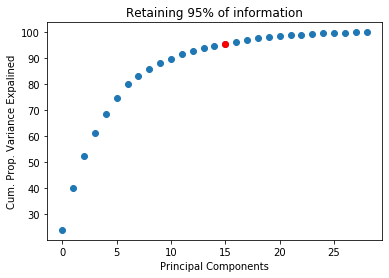

In [38]:
var_comp_sum = cum_var_exp[:29]

# Show cumulative proportion of varaince with respect to components
print("Cumulative proportion of variance explained vector: \n%s" %var_comp_sum)

# x-axis for number of principal components kept
num_comp = range(0,len(eigen_vals_eig[:29]))
plt.title('Retaining 95% of information')
plt.xlabel('Principal Components')
plt.ylabel('Cum. Prop. Variance Expalined')

plt.scatter(num_comp, var_comp_sum)
plt.plot(num_comp[15], var_comp_sum[15], 'ro')
plt.show()



In [39]:
# Compute the projection matrix based on the top eigen vectors for Training data
num_features = Training_flattened.shape[1]
proj_mat = eig_pairs[0][1].reshape(num_features,1)
for eig_vec_idx in range(1, num_vec_to_keep):
    proj_mat = np.hstack((proj_mat, eig_pairs[eig_vec_idx][1].reshape(num_features,1)))

# Projecting the training data on eigenspace based on K components 
Xtrain_pca = Training_flattened.dot(proj_mat)

# Compute the projection matrix based on the top eigen vectors for Testing data
num_features = Testing_flattened.shape[1]
proj_mat = eig_pairs[0][1].reshape(num_features,1)
for eig_vec_idx in range(1, num_vec_to_keep):
    proj_mat = np.hstack((proj_mat, eig_pairs[eig_vec_idx][1].reshape(num_features,1)))

# Projecting the testing data on eigenspace based on K components     
Xtest_pca = Testing_flattened.dot(proj_mat)

In [40]:
#Getting Training labels
images = []
for i in range(len(People_training)):
    images.append(People_training[i].normal_ppd_8060)
    images.append(People_training[i].happy_ppd_8060)
    images.append(People_training[i].sad_ppd_8060)
titles_revised = []
for i in range(len(names)):
    titles_revised.append(names[i])
    titles_revised.append(names[i])
    titles_revised.append(names[i])
#Training labels
y_train = np.array(titles_revised)


#Getting Testing Labels
images = []
for i in range(len(People_testing)):
    images.append(People_testing[i].surprise_ppd_8060)
    images.append(People_testing[i].wink_ppd_8060)
titles_revised = []
for i in range(len(names)):
    titles_revised.append(names[i])
    titles_revised.append(names[i])
#Testing labels
y_test = np.array(titles_revised)

### With 1-NN classifier

In [41]:
# K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier

NN1 = KNeighborsClassifier(n_neighbors=1,metric="manhattan")
NN1.fit(Xtrain_pca, y_train)
print("K-Nearest Neighbour::")
from sklearn.metrics import classification_report

y_pred_NN1 = NN1.predict(Xtest_pca)
print(classification_report(y_test, y_pred_NN1))

K-Nearest Neighbour::
              precision    recall  f1-score   support

       Ahmed       1.00      1.00      1.00         2
     Anthony       0.67      1.00      0.80         2
        Brad       1.00      1.00      1.00         2
     Charels       0.67      1.00      0.80         2
       Chris       1.00      1.00      1.00         2
      Darren       1.00      1.00      1.00         2
       Hamim       1.00      1.00      1.00         2
       James       1.00      1.00      1.00         2
        John       0.00      0.00      0.00         2
     Michael       1.00      1.00      1.00         2

    accuracy                           0.90        20
   macro avg       0.83      0.90      0.86        20
weighted avg       0.83      0.90      0.86        20



D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [42]:
# K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier

NN1 = KNeighborsClassifier(n_neighbors=1)
NN1.fit(Xtrain_pca, y_train)
print("K-Nearest Neighbour::")
from sklearn.metrics import classification_report

y_pred_NN1 = NN1.predict(Xtest_pca)
print(classification_report(y_test, y_pred_NN1))

K-Nearest Neighbour::
              precision    recall  f1-score   support

       Ahmed       1.00      1.00      1.00         2
     Anthony       1.00      1.00      1.00         2
        Brad       1.00      1.00      1.00         2
     Charels       0.50      0.50      0.50         2
       Chris       0.67      1.00      0.80         2
      Darren       1.00      1.00      1.00         2
       Hamim       0.67      1.00      0.80         2
       James       1.00      1.00      1.00         2
        John       0.00      0.00      0.00         2
     Michael       1.00      1.00      1.00         2

    accuracy                           0.85        20
   macro avg       0.78      0.85      0.81        20
weighted avg       0.78      0.85      0.81        20



D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### With 3-NN classifier

In [43]:
# K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier

NN3 = KNeighborsClassifier(n_neighbors=3,metric="manhattan")
NN3.fit(Xtrain_pca, y_train)
print("K-Nearest Neighbour::")
from sklearn.metrics import classification_report

y_pred_NN3 = NN3.predict(Xtest_pca)
print(classification_report(y_test, y_pred_NN3))

K-Nearest Neighbour::
              precision    recall  f1-score   support

       Ahmed       1.00      1.00      1.00         2
     Anthony       0.67      1.00      0.80         2
        Brad       1.00      0.50      0.67         2
     Charels       1.00      0.50      0.67         2
       Chris       0.50      1.00      0.67         2
      Darren       1.00      1.00      1.00         2
       Hamim       0.67      1.00      0.80         2
       James       1.00      1.00      1.00         2
        John       0.00      0.00      0.00         2
     Michael       1.00      1.00      1.00         2

    accuracy                           0.80        20
   macro avg       0.78      0.80      0.76        20
weighted avg       0.78      0.80      0.76        20



D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [44]:
# K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier

NN3 = KNeighborsClassifier(n_neighbors=3)
NN3.fit(Xtrain_pca, y_train)
print("K-Nearest Neighbour::")
from sklearn.metrics import classification_report

y_pred_NN3 = NN3.predict(Xtest_pca)
print(classification_report(y_test, y_pred_NN3))

K-Nearest Neighbour::
              precision    recall  f1-score   support

       Ahmed       1.00      1.00      1.00         2
     Anthony       0.67      1.00      0.80         2
        Brad       1.00      1.00      1.00         2
     Charels       1.00      0.50      0.67         2
       Chris       0.50      1.00      0.67         2
      Darren       1.00      1.00      1.00         2
       Hamim       1.00      1.00      1.00         2
       James       1.00      1.00      1.00         2
        John       0.00      0.00      0.00         2
     Michael       1.00      1.00      1.00         2

    accuracy                           0.85        20
   macro avg       0.82      0.85      0.81        20
weighted avg       0.82      0.85      0.81        20



D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### With 5-NN classifier


In [45]:
# K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier

NN5 = KNeighborsClassifier(n_neighbors=5,metric="manhattan")
NN5.fit(Xtrain_pca, y_train)
print("K-Nearest Neighbour::")
from sklearn.metrics import classification_report

y_pred_NN5 = NN5.predict(Xtest_pca)
print(classification_report(y_test, y_pred_NN5))

K-Nearest Neighbour::
              precision    recall  f1-score   support

       Ahmed       0.67      1.00      0.80         2
     Anthony       0.50      0.50      0.50         2
        Brad       1.00      1.00      1.00         2
     Charels       0.50      0.50      0.50         2
       Chris       0.67      1.00      0.80         2
      Darren       0.67      1.00      0.80         2
       Hamim       1.00      0.50      0.67         2
       James       1.00      1.00      1.00         2
        John       0.00      0.00      0.00         2
     Michael       1.00      1.00      1.00         2

    accuracy                           0.75        20
   macro avg       0.70      0.75      0.71        20
weighted avg       0.70      0.75      0.71        20



D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [46]:
# K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier

NN5 = KNeighborsClassifier(n_neighbors=5)
NN5.fit(Xtrain_pca, y_train)
print("K-Nearest Neighbour::")
from sklearn.metrics import classification_report

y_pred_NN5 = NN5.predict(Xtest_pca)
print(classification_report(y_test, y_pred_NN5))

K-Nearest Neighbour::
              precision    recall  f1-score   support

       Ahmed       0.67      1.00      0.80         2
     Anthony       0.50      1.00      0.67         2
        Brad       1.00      0.50      0.67         2
     Charels       1.00      0.50      0.67         2
       Chris       0.50      1.00      0.67         2
      Darren       1.00      1.00      1.00         2
       Hamim       1.00      0.50      0.67         2
       James       1.00      1.00      1.00         2
        John       0.00      0.00      0.00         2
     Michael       1.00      1.00      1.00         2

    accuracy                           0.75        20
   macro avg       0.77      0.75      0.71        20
weighted avg       0.77      0.75      0.71        20



D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Using EUCLIDEAN distance

In [47]:
projected_test_faces = Xtest_pca.copy()
projected_training_faces = Xtrain_pca.copy()

In [48]:
# Compute distance between input face and training images in the face space
temp_projected_test_faces = projected_test_faces
temp_projected_training_faces = projected_training_faces


In [49]:
#Calculating euclidean distances of every testing image with respect to training image
distances=[]
for i in range(0,temp_projected_test_faces.shape[0]):
    distances.append([np.linalg.norm(np.subtract(temp_projected_test_faces[i], x)) for x in temp_projected_training_faces])

indices = []
for i in range(len(distances)):
    indices.append(distances[i].index(min(distances[i])))

In [50]:
indices

[0, 2, 5, 3, 7, 8, 11, 5, 12, 12, 17, 16, 19, 19, 29, 11, 26, 24, 29, 27]

In [51]:
predicted_euclidean = []
for i in indices:
    predicted_euclidean.append(y_train[i])

In [52]:
predicted_euclidean = np.array(predicted_euclidean)

In [53]:
print(classification_report(y_test, predicted_euclidean))

              precision    recall  f1-score   support

       Ahmed       1.00      1.00      1.00         2
     Anthony       1.00      1.00      1.00         2
        Brad       1.00      1.00      1.00         2
     Charels       0.50      0.50      0.50         2
       Chris       0.67      1.00      0.80         2
      Darren       1.00      1.00      1.00         2
       Hamim       0.67      1.00      0.80         2
       James       1.00      1.00      1.00         2
        John       0.00      0.00      0.00         2
     Michael       1.00      1.00      1.00         2

    accuracy                           0.85        20
   macro avg       0.78      0.85      0.81        20
weighted avg       0.78      0.85      0.81        20



In [54]:
import pandas as pd
distance_dataframe = pd.DataFrame(distances)

### Finding top 5 matched faces for my face

In [55]:
#Finding indices with respect to training images of top 5 matches of Test image based on Euclidean distance
top_5_indices = []
for i in range(20):
    top_5_indices.append(distance_dataframe.transpose().sort_values(by=i)[i].index[:5].values)

In [56]:
#Predicted indices of training data having top 5 faces  
top_5_indices

[array([0, 2, 1, 4, 5], dtype=int64),
 array([2, 1, 0, 4, 5], dtype=int64),
 array([ 5,  4,  3,  2, 23], dtype=int64),
 array([ 3,  4,  5, 16, 15], dtype=int64),
 array([ 7, 18, 24, 26,  6], dtype=int64),
 array([ 8,  6,  7, 19, 21], dtype=int64),
 array([11, 10,  9,  5,  4], dtype=int64),
 array([ 5,  4, 11,  3, 10], dtype=int64),
 array([12, 13, 14, 29, 28], dtype=int64),
 array([12, 13, 14, 29, 28], dtype=int64),
 array([17, 15, 16, 28,  4], dtype=int64),
 array([16, 15, 17,  4, 28], dtype=int64),
 array([19, 29, 20,  8, 28], dtype=int64),
 array([19,  8, 20,  6, 29], dtype=int64),
 array([29,  6,  8, 23, 27], dtype=int64),
 array([11,  5,  4, 22, 23], dtype=int64),
 array([26, 24, 25, 12, 13], dtype=int64),
 array([24, 26, 25, 13, 14], dtype=int64),
 array([29, 27, 28, 12, 22], dtype=int64),
 array([27, 29, 13, 14, 12], dtype=int64)]

In [57]:
def Inputvspredicted(index):
    print("Top 5 Predictions based on Euclidean distance")
    plt.figure(figsize=(2.4 * 6, 2.4 * 1))  
    plt.subplot(2,6,1)
    plt.title("Testing image")
    plt.imshow(Testing_flattened[index].reshape(60,80), cmap=plt.cm.gray)
    plt.axis('off')
    plt.subplot(2,6,2)
    plt.title("Prediction 1")
    plt.imshow(Training_flattened[top_5_indices[index][0]].reshape(60,80), cmap=plt.cm.gray)
    plt.axis('off')
    plt.subplot(2,6,3)
    plt.title("Prediction 2")
    plt.imshow(Training_flattened[top_5_indices[index][1]].reshape(60,80), cmap=plt.cm.gray)
    plt.axis('off')    
    plt.subplot(2,6,4)
    plt.title("Prediction 3")
    plt.imshow(Training_flattened[top_5_indices[index][2]].reshape(60,80), cmap=plt.cm.gray)
    plt.axis('off')    
    plt.subplot(2,6,5)
    plt.title("Prediction 4")
    plt.imshow(Training_flattened[top_5_indices[index][3]].reshape(60,80), cmap=plt.cm.gray)
    plt.axis('off')
    plt.subplot(2,6,6)
    plt.title("Prediction 5")
    plt.axis('off')
    plt.imshow(Training_flattened[top_5_indices[index][4]].reshape(60,80), cmap=plt.cm.gray)
    plt.show()


Top 5 Predictions based on Euclidean distance


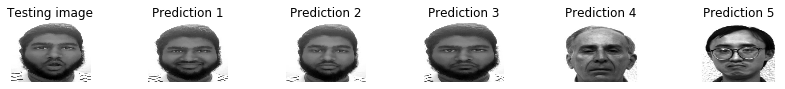

Top 5 Predictions based on Euclidean distance


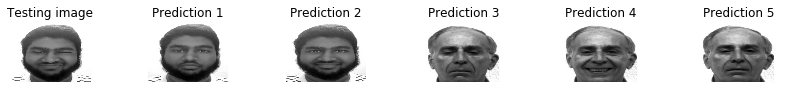

In [58]:
for i in range(18,20):
    Inputvspredicted(i)

# For cumulative sum of explained variance (K = 0.95)

In [59]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eigen_vals_eig[i]), eigen_vecs_eig[:,i]) for i in range(len(eigen_vals_eig))]

# Only keep a certain number of eigen vectors based on 
# the "explained variance percentage" which tells us how 
# much information (variance) can be attributed to each 
# of the principal components

exp_var_percentage = 0.95 # Threshold of 95% explained variance

tot = sum(eigen_vals_eig)
var_exp = [(i / tot)*100 for i in sorted(eigen_vals_eig, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

num_vec_to_keep = 0

for index, percentage in enumerate(cum_var_exp/100):
    if (percentage > exp_var_percentage):
        num_vec_to_keep = index + 1
        break

In [60]:
print("Number of eigenfaces that have 85% of information : ", num_vec_to_keep)

Number of eigenfaces that have 85% of information :  16


In [61]:
# Compute the projection matrix based on the top eigen vectors for Training data
num_features = Training_flattened.shape[1]
proj_mat = eig_pairs[0][1].reshape(num_features,1)
for eig_vec_idx in range(1, num_vec_to_keep):
    proj_mat = np.hstack((proj_mat, eig_pairs[eig_vec_idx][1].reshape(num_features,1)))

# Projecting the training data on eigenspace based on K components 
Xtrain_pca = Training_flattened.dot(proj_mat)

# Compute the projection matrix based on the top eigen vectors for Testing data
num_features = Testing_flattened.shape[1]
proj_mat = eig_pairs[0][1].reshape(num_features,1)
for eig_vec_idx in range(1, num_vec_to_keep):
    proj_mat = np.hstack((proj_mat, eig_pairs[eig_vec_idx][1].reshape(num_features,1)))

# Projecting the testing data on eigenspace based on K components     
Xtest_pca = Testing_flattened.dot(proj_mat)

In [62]:
#Getting Training labels
images = []
for i in range(len(People_training)):
    images.append(People_training[i].normal_ppd_8060)
    images.append(People_training[i].happy_ppd_8060)
    images.append(People_training[i].sad_ppd_8060)
titles_revised = []
for i in range(len(names)):
    titles_revised.append(names[i])
    titles_revised.append(names[i])
    titles_revised.append(names[i])
#Training labels
y_train = np.array(titles_revised)


#Getting Testing Labels
images = []
for i in range(len(People_testing)):
    images.append(People_testing[i].surprise_ppd_8060)
    images.append(People_testing[i].wink_ppd_8060)
titles_revised = []
for i in range(len(names)):
    titles_revised.append(names[i])
    titles_revised.append(names[i])
#Testing labels
y_test = np.array(titles_revised)

### With 1-NN classifier

In [63]:
# K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier

NN1 = KNeighborsClassifier(n_neighbors=1,metric="manhattan")
NN1.fit(Xtrain_pca, y_train)
print("K-Nearest Neighbour::")
from sklearn.metrics import classification_report

y_pred_NN1 = NN1.predict(Xtest_pca)
print(classification_report(y_test, y_pred_NN1))

K-Nearest Neighbour::
              precision    recall  f1-score   support

       Ahmed       1.00      1.00      1.00         2
     Anthony       0.67      1.00      0.80         2
        Brad       1.00      1.00      1.00         2
     Charels       1.00      1.00      1.00         2
       Chris       0.67      1.00      0.80         2
      Darren       1.00      1.00      1.00         2
       Hamim       1.00      1.00      1.00         2
       James       1.00      1.00      1.00         2
        John       0.00      0.00      0.00         2
     Michael       1.00      1.00      1.00         2

    accuracy                           0.90        20
   macro avg       0.83      0.90      0.86        20
weighted avg       0.83      0.90      0.86        20



D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [64]:
# K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier

NN1 = KNeighborsClassifier(n_neighbors=1)
NN1.fit(Xtrain_pca, y_train)
print("K-Nearest Neighbour::")
from sklearn.metrics import classification_report

y_pred_NN1 = NN1.predict(Xtest_pca)
print(classification_report(y_test, y_pred_NN1))

K-Nearest Neighbour::
              precision    recall  f1-score   support

       Ahmed       1.00      1.00      1.00         2
     Anthony       1.00      1.00      1.00         2
        Brad       1.00      1.00      1.00         2
     Charels       0.50      0.50      0.50         2
       Chris       0.67      1.00      0.80         2
      Darren       1.00      1.00      1.00         2
       Hamim       0.67      1.00      0.80         2
       James       1.00      1.00      1.00         2
        John       0.00      0.00      0.00         2
     Michael       1.00      1.00      1.00         2

    accuracy                           0.85        20
   macro avg       0.78      0.85      0.81        20
weighted avg       0.78      0.85      0.81        20



D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### With 3-NN classifier

In [65]:
# K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier

NN3 = KNeighborsClassifier(n_neighbors=3,metric="manhattan")
NN3.fit(Xtrain_pca, y_train)
print("K-Nearest Neighbour::")
from sklearn.metrics import classification_report

y_pred_NN3 = NN3.predict(Xtest_pca)
print(classification_report(y_test, y_pred_NN3))

K-Nearest Neighbour::
              precision    recall  f1-score   support

       Ahmed       1.00      1.00      1.00         2
     Anthony       0.67      1.00      0.80         2
        Brad       1.00      0.50      0.67         2
     Charels       1.00      0.50      0.67         2
       Chris       0.50      1.00      0.67         2
      Darren       1.00      1.00      1.00         2
       Hamim       0.67      1.00      0.80         2
       James       1.00      1.00      1.00         2
        John       0.00      0.00      0.00         2
     Michael       1.00      1.00      1.00         2

    accuracy                           0.80        20
   macro avg       0.78      0.80      0.76        20
weighted avg       0.78      0.80      0.76        20



D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [66]:
# K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier

NN3 = KNeighborsClassifier(n_neighbors=3)
NN3.fit(Xtrain_pca, y_train)
print("K-Nearest Neighbour::")
from sklearn.metrics import classification_report

y_pred_NN3 = NN3.predict(Xtest_pca)
print(classification_report(y_test, y_pred_NN3))

K-Nearest Neighbour::
              precision    recall  f1-score   support

       Ahmed       1.00      1.00      1.00         2
     Anthony       0.67      1.00      0.80         2
        Brad       1.00      1.00      1.00         2
     Charels       1.00      0.50      0.67         2
       Chris       0.50      1.00      0.67         2
      Darren       1.00      1.00      1.00         2
       Hamim       1.00      1.00      1.00         2
       James       1.00      1.00      1.00         2
        John       0.00      0.00      0.00         2
     Michael       1.00      1.00      1.00         2

    accuracy                           0.85        20
   macro avg       0.82      0.85      0.81        20
weighted avg       0.82      0.85      0.81        20



D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### With 5-NN classifier


In [67]:
# K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier

NN5 = KNeighborsClassifier(n_neighbors=5,metric="manhattan")
NN5.fit(Xtrain_pca, y_train)
print("K-Nearest Neighbour::")
from sklearn.metrics import classification_report

y_pred_NN5 = NN5.predict(Xtest_pca)
print(classification_report(y_test, y_pred_NN5))

K-Nearest Neighbour::
              precision    recall  f1-score   support

       Ahmed       0.67      1.00      0.80         2
     Anthony       0.40      1.00      0.57         2
        Brad       0.00      0.00      0.00         2
     Charels       1.00      0.50      0.67         2
       Chris       0.50      1.00      0.67         2
      Darren       1.00      1.00      1.00         2
       Hamim       1.00      0.50      0.67         2
       James       1.00      1.00      1.00         2
        John       0.00      0.00      0.00         2
     Michael       1.00      1.00      1.00         2

    accuracy                           0.70        20
   macro avg       0.66      0.70      0.64        20
weighted avg       0.66      0.70      0.64        20



D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [68]:
# K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier

NN5 = KNeighborsClassifier(n_neighbors=5)
NN5.fit(Xtrain_pca, y_train)
print("K-Nearest Neighbour::")
from sklearn.metrics import classification_report

y_pred_NN5 = NN5.predict(Xtest_pca)
print(classification_report(y_test, y_pred_NN5))

K-Nearest Neighbour::
              precision    recall  f1-score   support

       Ahmed       0.67      1.00      0.80         2
     Anthony       0.50      1.00      0.67         2
        Brad       1.00      0.50      0.67         2
     Charels       1.00      0.50      0.67         2
       Chris       0.50      1.00      0.67         2
      Darren       1.00      1.00      1.00         2
       Hamim       1.00      0.50      0.67         2
       James       1.00      1.00      1.00         2
        John       0.00      0.00      0.00         2
     Michael       1.00      1.00      1.00         2

    accuracy                           0.75        20
   macro avg       0.77      0.75      0.71        20
weighted avg       0.77      0.75      0.71        20



D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Using EUCLIDEAN distance

In [69]:
projected_test_faces = Xtest_pca.copy()
projected_training_faces = Xtrain_pca.copy()

In [70]:
# Compute distance between input face and training images in the face space
temp_projected_test_faces = projected_test_faces
temp_projected_training_faces = projected_training_faces


In [71]:
#Calculating euclidean distances of every testing image with respect to training image
distances=[]
for i in range(0,temp_projected_test_faces.shape[0]):
    distances.append([np.linalg.norm(np.subtract(temp_projected_test_faces[i], x)) for x in temp_projected_training_faces])

indices = []
for i in range(len(distances)):
    indices.append(distances[i].index(min(distances[i])))

In [72]:
indices

[0, 2, 5, 3, 7, 8, 11, 5, 12, 12, 15, 16, 19, 19, 29, 11, 26, 24, 29, 27]

In [73]:
predicted_euclidean = []
for i in indices:
    predicted_euclidean.append(y_train[i])

In [74]:
predicted_euclidean = np.array(predicted_euclidean)

In [75]:
print(classification_report(y_test, predicted_euclidean))

              precision    recall  f1-score   support

       Ahmed       1.00      1.00      1.00         2
     Anthony       1.00      1.00      1.00         2
        Brad       1.00      1.00      1.00         2
     Charels       0.50      0.50      0.50         2
       Chris       0.67      1.00      0.80         2
      Darren       1.00      1.00      1.00         2
       Hamim       0.67      1.00      0.80         2
       James       1.00      1.00      1.00         2
        John       0.00      0.00      0.00         2
     Michael       1.00      1.00      1.00         2

    accuracy                           0.85        20
   macro avg       0.78      0.85      0.81        20
weighted avg       0.78      0.85      0.81        20



In [76]:
import pandas as pd
distance_dataframe = pd.DataFrame(distances)

### Finding top 5 matched faces for my face

In [77]:
#Finding indices with respect to training images of top 5 matches of Test image based on Euclidean distance
top_5_indices = []
for i in range(20):
    top_5_indices.append(distance_dataframe.transpose().sort_values(by=i)[i].index[:5].values)

In [78]:
#Predicted indices of training data having top 5 faces  
top_5_indices

[array([0, 1, 2, 4, 5], dtype=int64),
 array([2, 1, 0, 4, 5], dtype=int64),
 array([5, 4, 3, 2, 1], dtype=int64),
 array([ 3,  4,  5, 16, 15], dtype=int64),
 array([ 7, 18, 24, 26,  6], dtype=int64),
 array([ 8,  6,  7, 19, 21], dtype=int64),
 array([11, 10,  9,  5,  4], dtype=int64),
 array([ 5,  3,  4, 11, 10], dtype=int64),
 array([12, 13, 14, 29, 28], dtype=int64),
 array([12, 13, 14, 29, 28], dtype=int64),
 array([15, 17, 16, 28,  4], dtype=int64),
 array([16, 15, 17,  4,  3], dtype=int64),
 array([19, 29, 20,  8, 28], dtype=int64),
 array([19,  8, 20,  6, 29], dtype=int64),
 array([29,  6,  8, 22, 27], dtype=int64),
 array([11,  5,  4, 22, 23], dtype=int64),
 array([26, 24, 25, 13, 14], dtype=int64),
 array([24, 26, 25, 13, 14], dtype=int64),
 array([29, 27, 28, 22, 12], dtype=int64),
 array([27, 29, 13, 12, 14], dtype=int64)]

In [79]:
def Inputvspredicted(index):
    print("Top 5 Predictions based on Euclidean distance")
    plt.figure(figsize=(2.4 * 6, 2.4 * 1))  
    plt.subplot(2,6,1)
    plt.title("Testing image")
    plt.imshow(Testing_flattened[index].reshape(60,80), cmap=plt.cm.gray)
    plt.axis('off')
    plt.subplot(2,6,2)
    plt.title("Prediction 1")
    plt.imshow(Training_flattened[top_5_indices[index][0]].reshape(60,80), cmap=plt.cm.gray)
    plt.axis('off')
    plt.subplot(2,6,3)
    plt.title("Prediction 2")
    plt.imshow(Training_flattened[top_5_indices[index][1]].reshape(60,80), cmap=plt.cm.gray)
    plt.axis('off')    
    plt.subplot(2,6,4)
    plt.title("Prediction 3")
    plt.imshow(Training_flattened[top_5_indices[index][2]].reshape(60,80), cmap=plt.cm.gray)
    plt.axis('off')    
    plt.subplot(2,6,5)
    plt.title("Prediction 4")
    plt.imshow(Training_flattened[top_5_indices[index][3]].reshape(60,80), cmap=plt.cm.gray)
    plt.axis('off')
    plt.subplot(2,6,6)
    plt.title("Prediction 5")
    plt.axis('off')
    plt.imshow(Training_flattened[top_5_indices[index][4]].reshape(60,80), cmap=plt.cm.gray)
    plt.show()


Top 5 Predictions based on Euclidean distance


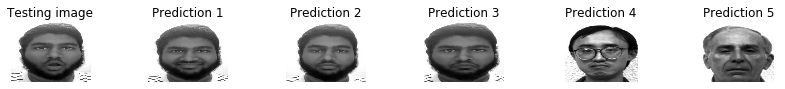

Top 5 Predictions based on Euclidean distance


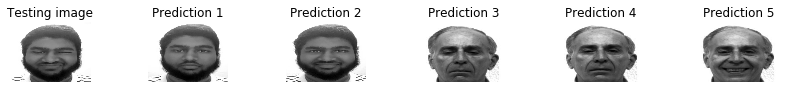

In [80]:
for i in range(18,20):
    Inputvspredicted(i)

# Performing analysis on 40 x 30 sized images

In [81]:
#Creating a list of all images flattened
def obtaindatavectors(k):
    out= np.zeros(People_training[k].normal_ppd_4030.shape, np.double)
    nl = cv2.normalize(People_training[k].normal_ppd_4030.reshape(-1), out, 1.0, 0.0, cv2.NORM_MINMAX, dtype=cv2.CV_64F)
    hp = cv2.normalize(People_training[k].sad_ppd_4030.reshape(-1), out, 1.0, 0.0, cv2.NORM_MINMAX, dtype=cv2.CV_64F)
    sd = cv2.normalize(People_training[k].happy_ppd_4030.reshape(-1), out, 1.0, 0.0, cv2.NORM_MINMAX, dtype=cv2.CV_64F)    
#     cl = People[k].cl_ppd.flatten()
#     nl = People[k].normal_ppd.flatten()
#     hp = People[k].happy_ppd.flatten()
#     sd = People[k].sad_ppd.flatten() 
    image = nl,hp,sd
    return image
images_flattened = []
for i in range(0,10):
    images_flattened.append(obtaindatavectors(i))
import itertools
flattened_list = list(itertools.chain(*images_flattened))
flattened_list = np.transpose(flattened_list)
flattened_list = np.asmatrix(flattened_list)
Training_flattened = (flattened_list.T)
print(np.shape(Training_flattened))

(30, 1200)


In [82]:
#Creating a list of all  flattened Testing images
def obtaindatavectors(k):
    out= np.zeros(People_training[k].normal_ppd_4030.shape, np.double)
    spd = cv2.normalize(People_testing[k].surprise_ppd_4030.reshape(-1), out, 1.0, 0.0, cv2.NORM_MINMAX, dtype=cv2.CV_64F)
    wnk = cv2.normalize(People_testing[k].wink_ppd_4030.reshape(-1), out, 1.0, 0.0, cv2.NORM_MINMAX, dtype=cv2.CV_64F)    
#     cl = People[k].cl_ppd.flatten()
#     nl = People[k].normal_ppd.flatten()
#     hp = People[k].happy_ppd.flatten()
#     sd = People[k].sad_ppd.flatten() 
    image = spd,wnk
    return image
images_flattened = []
for i in range(0,10):
    images_flattened.append(obtaindatavectors(i))
import itertools
flattened_list = list(itertools.chain(*images_flattened))
flattened_list = np.transpose(flattened_list)
flattened_list = np.asmatrix(flattened_list)

Testing_flattened = (flattened_list.T)
print(np.shape(Testing_flattened))

(20, 1200)


(1200, 1200)

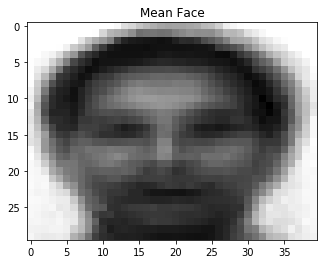

In [83]:
faces_matrix = Training_flattened.copy()
mean_face = np.mean(faces_matrix, axis=0)
mean_face.shape
plt.imshow(mean_face.reshape(30,40),cmap='gray'); 
plt.title('Mean Face')

### normalization
faces_norm = faces_matrix - mean_face
faces_norm.shape
# Calculate covariance matrix
face_cov = np.cov(faces_norm.T) #np.cov expects features as rows and observations as columns, so transposed
face_cov.shape

In [84]:
eigen_vals_eig,eigen_vecs_eig = np.linalg.eig(face_cov)
#Checking shape
print("Shape of eigen vectors",eigen_vecs_eig.shape)
print("Shape of eigen values",eigen_vals_eig.shape)
#Removing the imaginary numbers
eigen_vecs_eig = np.real(eigen_vecs_eig)
eigen_vals_eig = np.real(eigen_vals_eig)

#Sorting eigenValues with their corresponding eigenvectors
idx = eigen_vals_eig.argsort()[::-1]   
eigen_vals_eig = eigen_vals_eig[idx]
eigen_vecs_eig = eigen_vecs_eig[:,idx]

Shape of eigen vectors (1200, 1200)
Shape of eigen values (1200,)


Text(0.5, 0.98, 'Top 10 Eigenfaces')

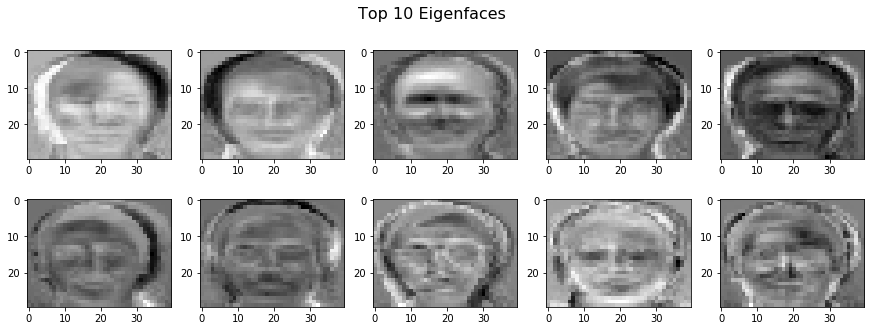

In [85]:
fig, axs = plt.subplots(1,3,figsize=(15,5))
for i in np.arange(10):
    ax = plt.subplot(2,5,i+1)
    img = eigen_vecs_eig[:,i].reshape(30,40)
    plt.imshow(img, cmap='gray')
fig.suptitle("Top 10 Eigenfaces", fontsize=16)

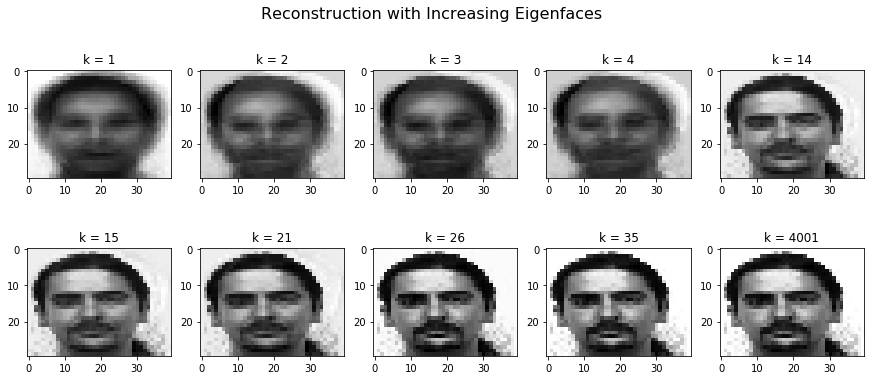

In [86]:
fig, axs = plt.subplots(2,5,figsize=(15,6))
for k, i in zip([0,1,2,3,13,14,20,25,34,4000],np.arange(10)):
    # Reconstruct the first picture '1a.jpg' whose index is 0.
    weight = faces_norm[24,:].dot(eigen_vecs_eig[:,:k]) # Get PC scores of the images
    projected_face = weight.dot(eigen_vecs_eig[:,:k].T) # Reconstruct first face in dataset using k PCs
    ax = plt.subplot(2,5,i+1)
    ax.set_title("k = "+str(k+1))
    plt.imshow(projected_face.reshape(30,40)+mean_face.reshape(30,40),cmap='gray');
fig.suptitle(("Reconstruction with Increasing Eigenfaces"), fontsize=16);

# For cumulative sum of explained variance (K = 0.85)

In [87]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eigen_vals_eig[i]), eigen_vecs_eig[:,i]) for i in range(len(eigen_vals_eig))]

# Only keep a certain number of eigen vectors based on 
# the "explained variance percentage" which tells us how 
# much information (variance) can be attributed to each 
# of the principal components

exp_var_percentage = 0.85 # Threshold of 85% explained variance

tot = sum(eigen_vals_eig)
var_exp = [(i / tot)*100 for i in sorted(eigen_vals_eig, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

num_vec_to_keep = 0

for index, percentage in enumerate(cum_var_exp/100):
    if (percentage > exp_var_percentage):
        num_vec_to_keep = index + 1
        break

In [88]:
print("Number of eigenfaces that have 95% of information : ", num_vec_to_keep)

Number of eigenfaces that have 95% of information :  9


In [89]:
# Compute the projection matrix based on the top eigen vectors for Training data
num_features = Training_flattened.shape[1]
proj_mat = eig_pairs[0][1].reshape(num_features,1)
for eig_vec_idx in range(1, num_vec_to_keep):
    proj_mat = np.hstack((proj_mat, eig_pairs[eig_vec_idx][1].reshape(num_features,1)))

# Projecting the training data on eigenspace based on K components 
Xtrain_pca = Training_flattened.dot(proj_mat)

# Compute the projection matrix based on the top eigen vectors for Testing data
num_features = Testing_flattened.shape[1]
proj_mat = eig_pairs[0][1].reshape(num_features,1)
for eig_vec_idx in range(1, num_vec_to_keep):
    proj_mat = np.hstack((proj_mat, eig_pairs[eig_vec_idx][1].reshape(num_features,1)))

# Projecting the testing data on eigenspace based on K components     
Xtest_pca = Testing_flattened.dot(proj_mat)

In [90]:
#Getting Training labels
images = []
for i in range(len(People_training)):
    images.append(People_training[i].normal_ppd_4030)
    images.append(People_training[i].happy_ppd_4030)
    images.append(People_training[i].sad_ppd_4030)
titles_revised = []
for i in range(len(names)):
    titles_revised.append(names[i])
    titles_revised.append(names[i])
    titles_revised.append(names[i])
#Training labels
y_train = np.array(titles_revised)


#Getting Testing Labels
images = []
for i in range(len(People_testing)):
    images.append(People_testing[i].surprise_ppd_4030)
    images.append(People_testing[i].wink_ppd_4030)
titles_revised = []
for i in range(len(names)):
    titles_revised.append(names[i])
    titles_revised.append(names[i])
#Testing labels
y_test = np.array(titles_revised)

### With 1-NN classifier

In [91]:
# K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier

NN1 = KNeighborsClassifier(n_neighbors=1,metric ="manhattan")
NN1.fit(Xtrain_pca, y_train)
print("K-Nearest Neighbour::")
from sklearn.metrics import classification_report

y_pred_NN1 = NN1.predict(Xtest_pca)
print(classification_report(y_test, y_pred_NN1))




K-Nearest Neighbour::
              precision    recall  f1-score   support

       Ahmed       1.00      1.00      1.00         2
     Anthony       0.67      1.00      0.80         2
        Brad       0.67      1.00      0.80         2
     Charels       1.00      0.50      0.67         2
       Chris       1.00      1.00      1.00         2
      Darren       1.00      1.00      1.00         2
       Hamim       1.00      1.00      1.00         2
       James       1.00      1.00      1.00         2
        John       1.00      0.50      0.67         2
     Michael       1.00      1.00      1.00         2

    accuracy                           0.90        20
   macro avg       0.93      0.90      0.89        20
weighted avg       0.93      0.90      0.89        20



In [92]:
# K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier

NN1 = KNeighborsClassifier(n_neighbors=1)
NN1.fit(Xtrain_pca, y_train)
print("K-Nearest Neighbour::")
from sklearn.metrics import classification_report

y_pred_NN1 = NN1.predict(Xtest_pca)
print(classification_report(y_test, y_pred_NN1))


K-Nearest Neighbour::
              precision    recall  f1-score   support

       Ahmed       1.00      1.00      1.00         2
     Anthony       1.00      1.00      1.00         2
        Brad       1.00      1.00      1.00         2
     Charels       0.50      0.50      0.50         2
       Chris       0.67      1.00      0.80         2
      Darren       1.00      1.00      1.00         2
       Hamim       0.67      1.00      0.80         2
       James       1.00      1.00      1.00         2
        John       0.00      0.00      0.00         2
     Michael       1.00      1.00      1.00         2

    accuracy                           0.85        20
   macro avg       0.78      0.85      0.81        20
weighted avg       0.78      0.85      0.81        20



D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### With 3-NN classifier

In [93]:
# K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier

NN3 = KNeighborsClassifier(n_neighbors=3,metric ="manhattan")
NN3.fit(Xtrain_pca, y_train)
print("K-Nearest Neighbour::")
from sklearn.metrics import classification_report

y_pred_NN3 = NN3.predict(Xtest_pca)
print(classification_report(y_test, y_pred_NN3))

K-Nearest Neighbour::
              precision    recall  f1-score   support

       Ahmed       1.00      1.00      1.00         2
     Anthony       0.67      1.00      0.80         2
        Brad       1.00      1.00      1.00         2
     Charels       0.50      0.50      0.50         2
       Chris       0.67      1.00      0.80         2
      Darren       1.00      1.00      1.00         2
       Hamim       1.00      1.00      1.00         2
       James       1.00      1.00      1.00         2
        John       0.00      0.00      0.00         2
     Michael       1.00      1.00      1.00         2

    accuracy                           0.85        20
   macro avg       0.78      0.85      0.81        20
weighted avg       0.78      0.85      0.81        20



D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [94]:
# K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier

NN3 = KNeighborsClassifier(n_neighbors=3)
NN3.fit(Xtrain_pca, y_train)
print("K-Nearest Neighbour::")
from sklearn.metrics import classification_report

y_pred_NN3 = NN3.predict(Xtest_pca)
print(classification_report(y_test, y_pred_NN3))

K-Nearest Neighbour::
              precision    recall  f1-score   support

       Ahmed       1.00      1.00      1.00         2
     Anthony       0.50      0.50      0.50         2
        Brad       0.67      1.00      0.80         2
     Charels       0.50      0.50      0.50         2
       Chris       0.67      1.00      0.80         2
      Darren       1.00      1.00      1.00         2
       Hamim       1.00      1.00      1.00         2
       James       1.00      1.00      1.00         2
        John       0.00      0.00      0.00         2
     Michael       1.00      1.00      1.00         2

    accuracy                           0.80        20
   macro avg       0.73      0.80      0.76        20
weighted avg       0.73      0.80      0.76        20



D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### With 5-NN classifier


In [95]:
# K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier

NN5 = KNeighborsClassifier(n_neighbors=5,metric = "manhattan")
NN5.fit(Xtrain_pca, y_train)
print("K-Nearest Neighbour::")
from sklearn.metrics import classification_report

y_pred_NN5 = NN5.predict(Xtest_pca)
print(classification_report(y_test, y_pred_NN5))

K-Nearest Neighbour::
              precision    recall  f1-score   support

       Ahmed       1.00      1.00      1.00         2
     Anthony       0.33      0.50      0.40         2
        Brad       0.00      0.00      0.00         2
     Charels       1.00      0.50      0.67         2
       Chris       0.50      1.00      0.67         2
      Darren       1.00      1.00      1.00         2
       Hamim       0.67      1.00      0.80         2
       James       1.00      1.00      1.00         2
        John       0.00      0.00      0.00         2
     Michael       1.00      1.00      1.00         2

    accuracy                           0.70        20
   macro avg       0.65      0.70      0.65        20
weighted avg       0.65      0.70      0.65        20



D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [96]:
# K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier

NN5 = KNeighborsClassifier(n_neighbors=5)
NN5.fit(Xtrain_pca, y_train)
print("K-Nearest Neighbour::")
from sklearn.metrics import classification_report

y_pred_NN5 = NN5.predict(Xtest_pca)
print(classification_report(y_test, y_pred_NN5))

K-Nearest Neighbour::
              precision    recall  f1-score   support

       Ahmed       1.00      1.00      1.00         2
     Anthony       0.33      0.50      0.40         2
        Brad       0.50      0.50      0.50         2
     Charels       1.00      0.50      0.67         2
       Chris       0.50      1.00      0.67         2
      Darren       1.00      1.00      1.00         2
       Hamim       1.00      1.00      1.00         2
       James       1.00      1.00      1.00         2
        John       0.00      0.00      0.00         2
     Michael       1.00      1.00      1.00         2

    accuracy                           0.75        20
   macro avg       0.73      0.75      0.72        20
weighted avg       0.73      0.75      0.72        20



D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Using EUCLIDEAN distance

In [97]:
projected_test_faces = Xtest_pca.copy()
projected_training_faces = Xtrain_pca.copy()

In [98]:
# Compute distance between input face and training images in the face space
temp_projected_test_faces = projected_test_faces
temp_projected_training_faces = projected_training_faces


In [99]:
#Calculating euclidean distances of every testing image with respect to training image
distances=[]
for i in range(0,temp_projected_test_faces.shape[0]):
    distances.append([np.linalg.norm(np.subtract(temp_projected_test_faces[i], x)) for x in temp_projected_training_faces])

indices = []
for i in range(len(distances)):
    indices.append(distances[i].index(min(distances[i])))

In [100]:
indices

[2, 2, 5, 3, 7, 8, 11, 3, 14, 14, 15, 16, 19, 19, 29, 11, 26, 24, 29, 27]

In [101]:
import pandas as pd
distance_dataframe = pd.DataFrame(distances)

In [102]:
#Finding indices with respect to training images of top 5 matches of Test image based on Euclidean distance
top_5_indices = []
for i in range(20):
    top_5_indices.append(distance_dataframe.transpose().sort_values(by=i)[i].index[:5].values)

In [103]:
#Indices of training data which are predicted on testing data

top_5_indices

[array([2, 1, 0, 5, 4], dtype=int64),
 array([2, 1, 0, 4, 5], dtype=int64),
 array([ 5,  4,  3,  2, 23], dtype=int64),
 array([ 3,  4,  5, 20, 21], dtype=int64),
 array([ 7, 19, 18, 20, 25], dtype=int64),
 array([ 8,  6,  7, 21, 19], dtype=int64),
 array([11, 10,  9,  5,  3], dtype=int64),
 array([ 3,  5,  4, 11, 20], dtype=int64),
 array([14, 12, 13, 28, 29], dtype=int64),
 array([14, 13, 12, 28, 29], dtype=int64),
 array([15, 17, 16, 28,  3], dtype=int64),
 array([16, 15, 17, 28,  3], dtype=int64),
 array([19, 20, 29, 28,  8], dtype=int64),
 array([19, 20,  8,  6,  7], dtype=int64),
 array([29, 20,  6, 21, 25], dtype=int64),
 array([11,  5, 23, 22,  4], dtype=int64),
 array([26, 24, 25, 13, 20], dtype=int64),
 array([24, 26, 25, 13, 14], dtype=int64),
 array([29, 27, 28, 22, 20], dtype=int64),
 array([27, 29, 28, 20, 12], dtype=int64)]

In [104]:
predicted_euclidean = []
for i in indices:
    predicted_euclidean.append(y_train[i])

In [105]:
predicted_euclidean = np.array(predicted_euclidean)

In [106]:
print(classification_report(y_test, predicted_euclidean))

              precision    recall  f1-score   support

       Ahmed       1.00      1.00      1.00         2
     Anthony       1.00      1.00      1.00         2
        Brad       1.00      1.00      1.00         2
     Charels       0.50      0.50      0.50         2
       Chris       0.67      1.00      0.80         2
      Darren       1.00      1.00      1.00         2
       Hamim       0.67      1.00      0.80         2
       James       1.00      1.00      1.00         2
        John       0.00      0.00      0.00         2
     Michael       1.00      1.00      1.00         2

    accuracy                           0.85        20
   macro avg       0.78      0.85      0.81        20
weighted avg       0.78      0.85      0.81        20



In [107]:
#Indices of training data predicted for Test data
np.shape(np.array(top_5_indices))

(20, 5)

In [108]:
def Inputvspredicted(index):
    plt.figure(figsize=(2.4 * 6, 2.4 * 1))  
    plt.subplot(2,6,1)
    plt.title("Testing image")
    plt.imshow(Testing_flattened[index].reshape(30,40), cmap=plt.cm.gray)
    plt.axis('off')
    plt.subplot(2,6,2)
    plt.title("Prediction Rank 1")
    plt.imshow(Training_flattened[top_5_indices[index][0]].reshape(30,40), cmap=plt.cm.gray)
    plt.axis('off')
    plt.subplot(2,6,3)
    plt.title("Prediction Rank 2")
    plt.imshow(Training_flattened[top_5_indices[index][1]].reshape(30,40), cmap=plt.cm.gray)
    plt.axis('off')    
    plt.subplot(2,6,4)
    plt.title("Prediction Rank 3")
    plt.imshow(Training_flattened[top_5_indices[index][2]].reshape(30,40), cmap=plt.cm.gray)
    plt.axis('off')    
    plt.subplot(2,6,5)
    plt.title("Prediction Rank 4")
    plt.imshow(Training_flattened[top_5_indices[index][3]].reshape(30,40), cmap=plt.cm.gray)
    plt.axis('off')
    plt.subplot(2,6,6)
    plt.title("Prediction Rank 5")
    plt.axis('off')
    plt.imshow(Training_flattened[top_5_indices[index][4]].reshape(30,40), cmap=plt.cm.gray)
    plt.show()


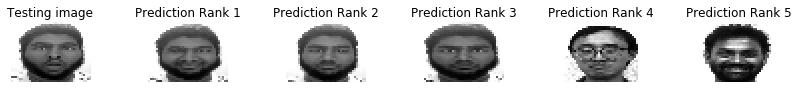

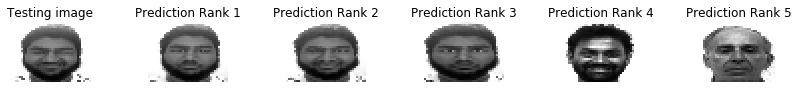

In [109]:
for i in range(18,20):
    Inputvspredicted(i)


# For cumulative sum of explained variance (K = 0.95)

In [110]:
# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eigen_vals_eig[i]), eigen_vecs_eig[:,i]) for i in range(len(eigen_vals_eig))]

# Only keep a certain number of eigen vectors based on 
# the "explained variance percentage" which tells us how 
# much information (variance) can be attributed to each 
# of the principal components

exp_var_percentage = 0.85 # Threshold of 85% explained variance

tot = sum(eigen_vals_eig)
var_exp = [(i / tot)*100 for i in sorted(eigen_vals_eig, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

num_vec_to_keep = 0

for index, percentage in enumerate(cum_var_exp/100):
    if (percentage > exp_var_percentage):
        num_vec_to_keep = index + 1
        break

In [111]:
print("Number of eigenfaces that have 95% of information : ", num_vec_to_keep)

Number of eigenfaces that have 95% of information :  9


In [112]:
# Compute the projection matrix based on the top eigen vectors for Training data
num_features = Training_flattened.shape[1]
proj_mat = eig_pairs[0][1].reshape(num_features,1)
for eig_vec_idx in range(1, num_vec_to_keep):
    proj_mat = np.hstack((proj_mat, eig_pairs[eig_vec_idx][1].reshape(num_features,1)))

# Projecting the training data on eigenspace based on K components 
Xtrain_pca = Training_flattened.dot(proj_mat)

# Compute the projection matrix based on the top eigen vectors for Testing data
num_features = Testing_flattened.shape[1]
proj_mat = eig_pairs[0][1].reshape(num_features,1)
for eig_vec_idx in range(1, num_vec_to_keep):
    proj_mat = np.hstack((proj_mat, eig_pairs[eig_vec_idx][1].reshape(num_features,1)))

# Projecting the testing data on eigenspace based on K components     
Xtest_pca = Testing_flattened.dot(proj_mat)

In [113]:
#Getting Training labels
images = []
for i in range(len(People_training)):
    images.append(People_training[i].normal_ppd_4030)
    images.append(People_training[i].happy_ppd_4030)
    images.append(People_training[i].sad_ppd_4030)
titles_revised = []
for i in range(len(names)):
    titles_revised.append(names[i])
    titles_revised.append(names[i])
    titles_revised.append(names[i])
#Training labels
y_train = np.array(titles_revised)


#Getting Testing Labels
images = []
for i in range(len(People_testing)):
    images.append(People_testing[i].surprise_ppd_4030)
    images.append(People_testing[i].wink_ppd_4030)
titles_revised = []
for i in range(len(names)):
    titles_revised.append(names[i])
    titles_revised.append(names[i])
#Testing labels
y_test = np.array(titles_revised)

### With 1-NN classifier

In [114]:
# K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier

NN1 = KNeighborsClassifier(n_neighbors=1,metric ="manhattan")
NN1.fit(Xtrain_pca, y_train)
print("K-Nearest Neighbour::")
from sklearn.metrics import classification_report

y_pred_NN1 = NN1.predict(Xtest_pca)
print(classification_report(y_test, y_pred_NN1))




K-Nearest Neighbour::
              precision    recall  f1-score   support

       Ahmed       1.00      1.00      1.00         2
     Anthony       0.67      1.00      0.80         2
        Brad       0.67      1.00      0.80         2
     Charels       1.00      0.50      0.67         2
       Chris       1.00      1.00      1.00         2
      Darren       1.00      1.00      1.00         2
       Hamim       1.00      1.00      1.00         2
       James       1.00      1.00      1.00         2
        John       1.00      0.50      0.67         2
     Michael       1.00      1.00      1.00         2

    accuracy                           0.90        20
   macro avg       0.93      0.90      0.89        20
weighted avg       0.93      0.90      0.89        20



In [115]:
Xtest_pca.shape

(20, 9)

In [116]:
NN1.kneighbors(Xtest_pca[19])

(array([[4.16070553]]), array([[27]], dtype=int64))

In [117]:
# K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier

NN1 = KNeighborsClassifier(n_neighbors=1)
NN1.fit(Xtrain_pca, y_train)
print("K-Nearest Neighbour::")
from sklearn.metrics import classification_report

y_pred_NN1 = NN1.predict(Xtest_pca)
print(classification_report(y_test, y_pred_NN1))


K-Nearest Neighbour::
              precision    recall  f1-score   support

       Ahmed       1.00      1.00      1.00         2
     Anthony       1.00      1.00      1.00         2
        Brad       1.00      1.00      1.00         2
     Charels       0.50      0.50      0.50         2
       Chris       0.67      1.00      0.80         2
      Darren       1.00      1.00      1.00         2
       Hamim       0.67      1.00      0.80         2
       James       1.00      1.00      1.00         2
        John       0.00      0.00      0.00         2
     Michael       1.00      1.00      1.00         2

    accuracy                           0.85        20
   macro avg       0.78      0.85      0.81        20
weighted avg       0.78      0.85      0.81        20



D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### With 3-NN classifier

In [118]:
# K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier

NN3 = KNeighborsClassifier(n_neighbors=3,metric ="manhattan")
NN3.fit(Xtrain_pca, y_train)
print("K-Nearest Neighbour::")
from sklearn.metrics import classification_report

y_pred_NN3 = NN3.predict(Xtest_pca)
print(classification_report(y_test, y_pred_NN3))

K-Nearest Neighbour::
              precision    recall  f1-score   support

       Ahmed       1.00      1.00      1.00         2
     Anthony       0.67      1.00      0.80         2
        Brad       1.00      1.00      1.00         2
     Charels       0.50      0.50      0.50         2
       Chris       0.67      1.00      0.80         2
      Darren       1.00      1.00      1.00         2
       Hamim       1.00      1.00      1.00         2
       James       1.00      1.00      1.00         2
        John       0.00      0.00      0.00         2
     Michael       1.00      1.00      1.00         2

    accuracy                           0.85        20
   macro avg       0.78      0.85      0.81        20
weighted avg       0.78      0.85      0.81        20



D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [119]:
NN3.kneighbors(Xtest_pca[15])

(array([[14.335395  , 14.4089841 , 14.52000824]]),
 array([[23, 11,  5]], dtype=int64))

In [120]:
# K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier

NN3 = KNeighborsClassifier(n_neighbors=3)
NN3.fit(Xtrain_pca, y_train)
print("K-Nearest Neighbour::")
from sklearn.metrics import classification_report

y_pred_NN3 = NN3.predict(Xtest_pca)
print(classification_report(y_test, y_pred_NN3))

K-Nearest Neighbour::
              precision    recall  f1-score   support

       Ahmed       1.00      1.00      1.00         2
     Anthony       0.50      0.50      0.50         2
        Brad       0.67      1.00      0.80         2
     Charels       0.50      0.50      0.50         2
       Chris       0.67      1.00      0.80         2
      Darren       1.00      1.00      1.00         2
       Hamim       1.00      1.00      1.00         2
       James       1.00      1.00      1.00         2
        John       0.00      0.00      0.00         2
     Michael       1.00      1.00      1.00         2

    accuracy                           0.80        20
   macro avg       0.73      0.80      0.76        20
weighted avg       0.73      0.80      0.76        20



D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### With 5-NN classifier


In [121]:
# K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier

NN5 = KNeighborsClassifier(n_neighbors=5,metric = "manhattan")
NN5.fit(Xtrain_pca, y_train)
print("K-Nearest Neighbour::")
from sklearn.metrics import classification_report

y_pred_NN5 = NN5.predict(Xtest_pca)
print(classification_report(y_test, y_pred_NN5))

K-Nearest Neighbour::
              precision    recall  f1-score   support

       Ahmed       1.00      1.00      1.00         2
     Anthony       0.33      0.50      0.40         2
        Brad       0.00      0.00      0.00         2
     Charels       1.00      0.50      0.67         2
       Chris       0.50      1.00      0.67         2
      Darren       1.00      1.00      1.00         2
       Hamim       0.67      1.00      0.80         2
       James       1.00      1.00      1.00         2
        John       0.00      0.00      0.00         2
     Michael       1.00      1.00      1.00         2

    accuracy                           0.70        20
   macro avg       0.65      0.70      0.65        20
weighted avg       0.65      0.70      0.65        20



D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [122]:
# K-Nearest Neighbour
from sklearn.neighbors import KNeighborsClassifier

NN5 = KNeighborsClassifier(n_neighbors=5)
NN5.fit(Xtrain_pca, y_train)
print("K-Nearest Neighbour::")
from sklearn.metrics import classification_report

y_pred_NN5 = NN5.predict(Xtest_pca)
print(classification_report(y_test, y_pred_NN5))

K-Nearest Neighbour::
              precision    recall  f1-score   support

       Ahmed       1.00      1.00      1.00         2
     Anthony       0.33      0.50      0.40         2
        Brad       0.50      0.50      0.50         2
     Charels       1.00      0.50      0.67         2
       Chris       0.50      1.00      0.67         2
      Darren       1.00      1.00      1.00         2
       Hamim       1.00      1.00      1.00         2
       James       1.00      1.00      1.00         2
        John       0.00      0.00      0.00         2
     Michael       1.00      1.00      1.00         2

    accuracy                           0.75        20
   macro avg       0.73      0.75      0.72        20
weighted avg       0.73      0.75      0.72        20



D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Using EUCLIDEAN distance

In [123]:
projected_test_faces = Xtest_pca.copy()
projected_training_faces = Xtrain_pca.copy()

In [124]:
# Compute distance between input face and training images in the face space
temp_projected_test_faces = projected_test_faces
temp_projected_training_faces = projected_training_faces


In [125]:
#Calculating euclidean distances of every testing image with respect to training image
distances=[]
for i in range(0,temp_projected_test_faces.shape[0]):
    distances.append([np.linalg.norm(np.subtract(temp_projected_test_faces[i], x)) for x in temp_projected_training_faces])

indices = []
for i in range(len(distances)):
    indices.append(distances[i].index(min(distances[i])))

In [126]:
indices

[2, 2, 5, 3, 7, 8, 11, 3, 14, 14, 15, 16, 19, 19, 29, 11, 26, 24, 29, 27]

In [127]:
import pandas as pd
distance_dataframe = pd.DataFrame(distances)

In [128]:
#Finding indices with respect to training images of top 5 matches of Test image based on Euclidean distance
top_5_indices = []
for i in range(20):
    top_5_indices.append(distance_dataframe.transpose().sort_values(by=i)[i].index[:5].values)

In [129]:
#Indices of training data which are predicted on testing data

top_5_indices

[array([2, 1, 0, 5, 4], dtype=int64),
 array([2, 1, 0, 4, 5], dtype=int64),
 array([ 5,  4,  3,  2, 23], dtype=int64),
 array([ 3,  4,  5, 20, 21], dtype=int64),
 array([ 7, 19, 18, 20, 25], dtype=int64),
 array([ 8,  6,  7, 21, 19], dtype=int64),
 array([11, 10,  9,  5,  3], dtype=int64),
 array([ 3,  5,  4, 11, 20], dtype=int64),
 array([14, 12, 13, 28, 29], dtype=int64),
 array([14, 13, 12, 28, 29], dtype=int64),
 array([15, 17, 16, 28,  3], dtype=int64),
 array([16, 15, 17, 28,  3], dtype=int64),
 array([19, 20, 29, 28,  8], dtype=int64),
 array([19, 20,  8,  6,  7], dtype=int64),
 array([29, 20,  6, 21, 25], dtype=int64),
 array([11,  5, 23, 22,  4], dtype=int64),
 array([26, 24, 25, 13, 20], dtype=int64),
 array([24, 26, 25, 13, 14], dtype=int64),
 array([29, 27, 28, 22, 20], dtype=int64),
 array([27, 29, 28, 20, 12], dtype=int64)]

In [130]:
predicted_euclidean = []
for i in indices:
    predicted_euclidean.append(y_train[i])

In [131]:
predicted_euclidean = np.array(predicted_euclidean)

In [132]:
print(classification_report(y_test, predicted_euclidean))

              precision    recall  f1-score   support

       Ahmed       1.00      1.00      1.00         2
     Anthony       1.00      1.00      1.00         2
        Brad       1.00      1.00      1.00         2
     Charels       0.50      0.50      0.50         2
       Chris       0.67      1.00      0.80         2
      Darren       1.00      1.00      1.00         2
       Hamim       0.67      1.00      0.80         2
       James       1.00      1.00      1.00         2
        John       0.00      0.00      0.00         2
     Michael       1.00      1.00      1.00         2

    accuracy                           0.85        20
   macro avg       0.78      0.85      0.81        20
weighted avg       0.78      0.85      0.81        20



In [133]:
#Indices of training data predicted for Test data
np.shape(np.array(top_5_indices))

(20, 5)

In [134]:
def Inputvspredicted(index):
    print("Top 5 Predictions based on Euclidean distance")
    plt.figure(figsize=(2.4 * 6, 2.4 * 1))  
    plt.subplot(2,6,1)
    plt.title("Testing image")
    plt.imshow(Testing_flattened[index].reshape(30,40), cmap=plt.cm.gray)
    plt.axis('off')
    plt.subplot(2,6,2)
    plt.title("Prediction 1")
    plt.imshow(Training_flattened[top_5_indices[index][0]].reshape(30,40), cmap=plt.cm.gray)
    plt.axis('off')
    plt.subplot(2,6,3)
    plt.title("Prediction 2")
    plt.imshow(Training_flattened[top_5_indices[index][1]].reshape(30,40), cmap=plt.cm.gray)
    plt.axis('off')    
    plt.subplot(2,6,4)
    plt.title("Prediction 3")
    plt.imshow(Training_flattened[top_5_indices[index][2]].reshape(30,40), cmap=plt.cm.gray)
    plt.axis('off')    
    plt.subplot(2,6,5)
    plt.title("Prediction 4")
    plt.imshow(Training_flattened[top_5_indices[index][3]].reshape(30,40), cmap=plt.cm.gray)
    plt.axis('off')
    plt.subplot(2,6,6)
    plt.title("Prediction 5")
    plt.axis('off')
    plt.imshow(Training_flattened[top_5_indices[index][4]].reshape(30,40), cmap=plt.cm.gray)
    plt.show()


Top 5 Predictions based on Euclidean distance


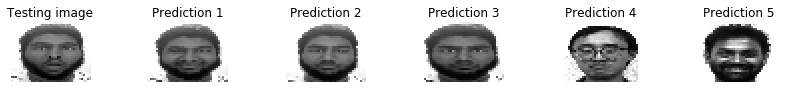

Top 5 Predictions based on Euclidean distance


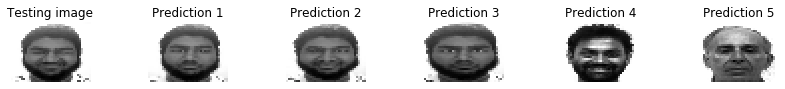

In [135]:
for i in range(18,20):
    Inputvspredicted(i)
